### Arquitectura
<img src='resources/images/architecture.jpg'>

In [53]:
# Mostrar contenido de la carpeta donde estamos trabajando

import os

def list_files(startpath):
    for root, dirs, files in os.walk(startpath):
        level = root.replace(startpath, '').count(os.sep)
        indent = ' ' * 7 * (level)
        print('{}{}/'.format(indent, os.path.basename(root)))
        subindent = ' ' * 7 * (level + 1)

list_files('.')

./
       .ipynb_checkpoints/
       data/
              test/
                     cat/
                     dog/
              test1/
                     cat/
                     dog/
              train/
                     cat/
                     dog/
       logs/
              fit/
                     20200126-161651/
       resources/
              images/


In [1]:
from time import time

In [2]:
# Esto guarda el momento en que empezo a correr el proceso, al final del notebook se calcula lo mismo y se determina
# cuantos segundos duro todo el proceso, luego lo transformo en hora, minuto, segundos

start_time = time()

In [3]:
# En este caso yo lo ejecute localmente por lo que tengo las carpetas en data
# En caso de querer correrlo en colab, son demasiadas las imagenes, por lo que al querer subirlas drive se tilda
# En ese caso hay que armar las carpetas, test, test1 y train . zip y subir los archivos
# El siguiente codigo sirve para descomprimir los rar y guardar la info en variables para usar
# Solo hay que cambiar las url por las de drive (Ej: data/train.zip)

#from zipfile import ZipFile

In [4]:
#train = ZipFile('data/train.zip', 'r')
#train.extractall('train')
#train.close()

In [5]:
#test = ZipFile('data/test.zip', 'r')
#test.extractall('test')
#test.close()

In [6]:
#test1 = ZipFile('data/test1.zip', 'r')
#test1.extractall('test1')
#test1.close()

In [8]:
import tensorflow
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.callbacks import TensorBoard

In [9]:
from warnings import filterwarnings
filterwarnings('ignore')

In [10]:
classifier = Sequential()
classifier.add(Conv2D(32,(3,3),input_shape=(64,64,3),activation = 'relu'))
classifier.add(MaxPooling2D(pool_size=(2,2),strides=2))
classifier.add(Conv2D(32,(3,3),activation = 'relu'))
classifier.add(MaxPooling2D(pool_size=(2,2),strides=2))
classifier.add(Flatten())
classifier.add(Dense(units=128,activation='relu'))
classifier.add(Dense(units=1,activation='sigmoid'))
adam = tensorflow.keras.optimizers.Adam(lr=0.001, beta_1=0.9, beta_2=0.999, epsilon=None, decay=0.0, amsgrad=False)
classifier.compile(optimizer=adam,loss='binary_crossentropy',metrics=['accuracy'])

Instructions for updating:
Colocations handled automatically by placer.


In [11]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(rescale=1./255,
                                   shear_range=0.1,
                                   zoom_range=0.1,
                                   horizontal_flip=True)
test_datagen = ImageDataGenerator(rescale=1./255)

#Training Set
train_set = train_datagen.flow_from_directory('data/train',
                                             target_size=(64,64),
                                             batch_size=32,
                                             class_mode='binary')
#Validation Set
test_set = test_datagen.flow_from_directory('data/test',
                                           target_size=(64,64),
                                           batch_size = 32,
                                           class_mode='binary',
                                           shuffle=False)
#Test Set /no output available
test_set1 = test_datagen.flow_from_directory('data/test1',
                                            target_size=(64,64),
                                            batch_size=32,
                                            shuffle=False)

Found 25000 images belonging to 2 classes.
Found 12000 images belonging to 2 classes.
Found 12000 images belonging to 2 classes.


In [12]:
# Esta linea va a guardar los logs o registros de lo que esta pasando a medida que se entrena el modelo
# Esos logs luego se pueden leer desde Tensorboard (Mas abajo les muestro lo que es) para poder verlos de forma
# interactiva 

import datetime
log_dir="logs/fit/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
tensorboard_callback = tensorflow.keras.callbacks.TensorBoard(log_dir=log_dir, histogram_freq=1)

In [13]:
# capture es un comando "magico", si no esta comentado no muestra la informacion de las epocas, yo lo comente
# para que vean un poc mas de info
# Como pueden ver dentro del entrenamiento hay una llamada al tensorboard_callback creado en la celda de arriba
# a medida que se vaya entrenando el model va a ir guardando los logs en la carpeta logs/fit

#%%capture
classifier.fit_generator(train_set,
                        steps_per_epoch= 800, 
                        epochs = 100,
                        validation_data = test_set,
                        validation_steps = 20, 
                        callbacks=[tensorboard_callback]
                        );

Instructions for updating:
Use tf.cast instead.
Epoch 1/100
782/782 [==============================] - 407s 521ms/step - loss: 0.6208 - acc: 0.6484 - val_loss: 0.5930 - val_acc: 0.6909
Epoch 2/100
782/782 [==============================] - 403s 515ms/step - loss: 0.5144 - acc: 0.7460 - val_loss: 0.6187 - val_acc: 0.7160
Epoch 3/100
782/782 [==============================] - 406s 519ms/step - loss: 0.4692 - acc: 0.7767 - val_loss: 0.5642 - val_acc: 0.7278
Epoch 4/100
782/782 [==============================] - 409s 523ms/step - loss: 0.4378 - acc: 0.7947 - val_loss: 0.6070 - val_acc: 0.7316
Epoch 5/100
782/782 [==============================] - 412s 527ms/step - loss: 0.4107 - acc: 0.8108 - val_loss: 0.5906 - val_acc: 0.7347
Epoch 6/100
782/782 [==============================] - 412s 527ms/step - loss: 0.3850 - acc: 0.8272 - val_loss: 0.5587 - val_acc: 0.7503
Epoch 7/100
782/782 [==============================] - 378s 484ms/step - loss: 0.3601 - acc: 0.8406 - val_loss: 0.5259 - val_acc: 

In [14]:
# De esta forma se puede guardar el modelo ya entrenado para usar en las predicciones, en la entrega 5 lo van a ver
# solo que los guarda en formato .pkl

classifier.save('resources/modelo_entrenado.h5')

### Ahora que ya termino el entrenamiento podemos ver los logs en el Tensorboard
### Para usarlo tienen que ejecutar el siguiente comando desde el cmd de windows, la consola de linux o mac, o si tienen instalado Git tambien pueden desde su consola
### EL comando es: <b style='color: red'>tensorboard --logdir='logs/fit' --host=127.0.0.1</b>
### --logdir tiene que ser igual a la ubicacion donde se guardaron los logs, como yo lo ejecuto dentro desde la misma carpeta mi direccion es logs/fit
### Una vez ejecutado ese comando se "levanta" un server con un dashbord para que puedan ver la informacion, para hacerlo tienen que ir al navegador y entrar a la siguiente direccion <b style='color: red'>localhost:6006</b>
### En el dashboard pueden ver muchisima informacion, queda en ustedes investigarlo
<img src='resources/images/12.png'>
<img src='resources/images/123.png'>
<img src='resources/images/1234.png'>

In [54]:
# Cargamos el modelo

from tensorflow.keras.models import load_model
classifier = load_model('resources/modelo_entrenado.h5')

### Prediccion de una sola imagen

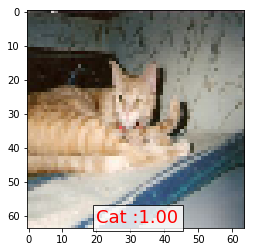

In [42]:
%matplotlib inline
import tensorflow
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt
import numpy as np
img1 = image.load_img('data/test/cat/20.jpg', target_size=(64, 64))
img = image.img_to_array(img1)
img = img/255
img = np.expand_dims(img, axis=0)
prediction = classifier.predict(img, batch_size=None,steps=1)
if(prediction[:,:]>0.5):
    value ='Dog :%1.2f'%(prediction[0,0])
    plt.text(20, 62,value,color='red',fontsize=18,bbox=dict(facecolor='white',alpha=0.8))
else:
    value ='Cat :%1.2f'%(1.0-prediction[0,0])
    plt.text(20, 62,value,color='red',fontsize=18,bbox=dict(facecolor='white',alpha=0.8))

plt.imshow(img1)
plt.show()

In [17]:
import pandas as pd
test_set.reset
ytesthat = classifier.predict_generator(test_set)
df = pd.DataFrame({
    'filename':test_set.filenames,
    'predict':ytesthat[:,0],
    'y':test_set.classes
})

In [18]:
pd.set_option('display.float_format', lambda x: '%.5f' % x)
df['y_pred'] = df['predict']>0.5
df.y_pred = df.y_pred.astype(int)
df.head(10)

,filename,predict,y,y_pred
0,cat\1.jpg,0.97750,0,1
1,cat\10.jpg,0.99687,0,1
2,cat\100.jpg,0.17804,0,0
3,cat\1000.jpg,0.99996,0,1
4,cat\1001.jpg,0.00000,0,0
5,cat\1002.jpg,0.00000,0,0
6,cat\1003.jpg,0.99986,0,1
7,cat\1004.jpg,0.00024,0,0
8,cat\1005.jpg,0.00036,0,0
9,cat\1006.jpg,0.00000,0,0


In [46]:
len(df), len(df.loc[df['y'] != df['y_pred']])

(12000, 2867)

In [55]:
misclassified = df[df['y']!=df['y_pred']]
print('Total imagenes ' + str(len(df)) + ' > Mal clasificadas : %d'%misclassified['y'].count())

Total imagenes 12000 > Mal clasificadas : 2867


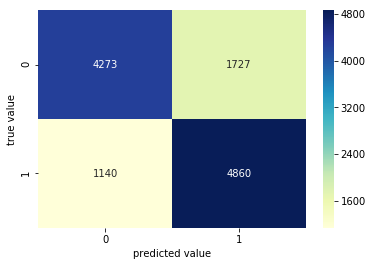

In [20]:
from sklearn.metrics import confusion_matrix 
import matplotlib.pyplot as plt
import seaborn as sns

conf_matrix = confusion_matrix(df.y,df.y_pred)
sns.heatmap(conf_matrix,cmap="YlGnBu",annot=True,fmt='g');
plt.xlabel('predicted value')
plt.ylabel('true value');

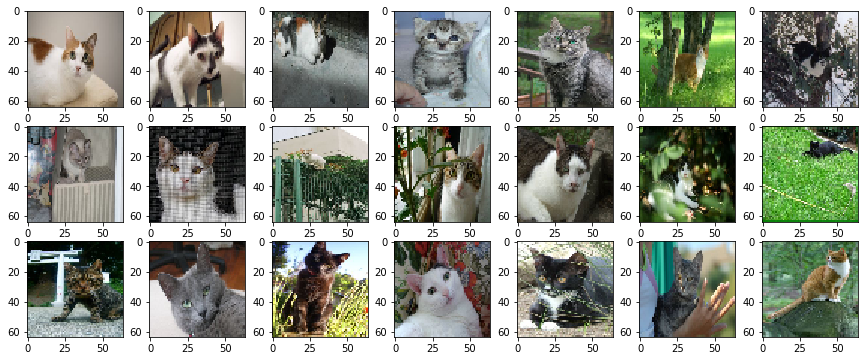

In [21]:
# Algunas de las imagenes de los perros mal clasificadas

import matplotlib.image as mpimg

CatasDog = df['filename'][(df.y==0)&(df.y_pred==1)]
fig=plt.figure(figsize=(15, 6))
columns = 7
rows = 3
for i in range(columns*rows):
    img = image.load_img('data/test/'+CatasDog.iloc[i], target_size=(64, 64))
    fig.add_subplot(rows, columns, i+1)
    plt.imshow(img)

plt.show()

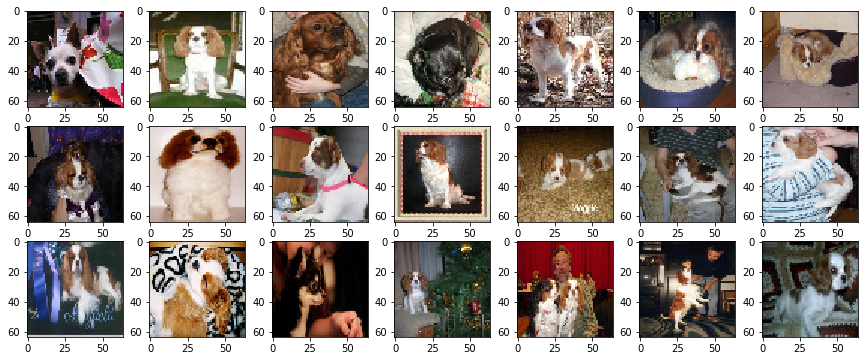

In [22]:
# Algunas de las imagenes de los gatos mal clasificadas

import matplotlib.image as mpimg

DogasCat = df['filename'][(df.y==1)&(df.y_pred==0)]
fig=plt.figure(figsize=(15, 6))
columns = 7
rows = 3
for i in range(columns*rows):
    #img = mpimg.imread()
    img = image.load_img('data/test/'+DogasCat.iloc[i], target_size=(64, 64))
    fig.add_subplot(rows, columns, i+1)
    plt.imshow(img)
plt.show()

In [23]:
classifier.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 62, 62, 32)        896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 31, 31, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 29, 29, 32)        9248      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
flatten (Flatten)            (None, 6272)              0         
_________________________________________________________________
dense (Dense)                (None, 128)               802944    
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 129       
Total para

### Filtros

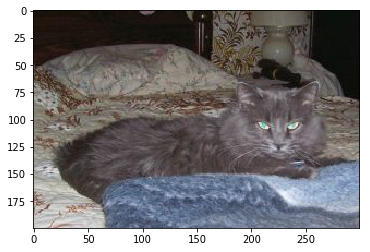

In [24]:
img1 = image.load_img('data/test/cat/14.jpg')
plt.imshow(img1);
img1 = image.load_img('data/test/cat/14.jpg', target_size=(64, 64))
img = image.img_to_array(img1)
img = img/255
img = np.expand_dims(img, axis=0)


In [25]:
model_layers = [ layer.name for layer in classifier.layers]
print('layer name : ',model_layers)

layer name :  ['conv2d', 'max_pooling2d', 'conv2d_1', 'max_pooling2d_1', 'flatten', 'dense', 'dense_1']


In [26]:
from tensorflow.keras.models import Model
conv2d_6_output = Model(inputs=classifier.input, outputs=classifier.get_layer('conv2d').output)
conv2d_7_output = Model(inputs=classifier.input,outputs=classifier.get_layer('conv2d_1').output)

In [27]:
conv2d_6_features = conv2d_6_output.predict(img)
conv2d_7_features = conv2d_7_output.predict(img)
print('First conv layer feature output shape : ',conv2d_6_features.shape)
print('First conv layer feature output shape : ',conv2d_7_features.shape)

First conv layer feature output shape :  (1, 62, 62, 32)
First conv layer feature output shape :  (1, 29, 29, 32)


### Salida de filtro de convolución simple

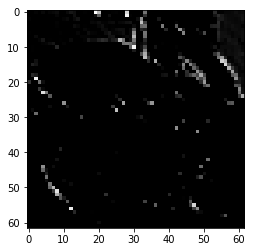

In [28]:
plt.imshow(conv2d_6_features[0, :, :, 4], cmap='gray')

### Primera salida de capa de convolución

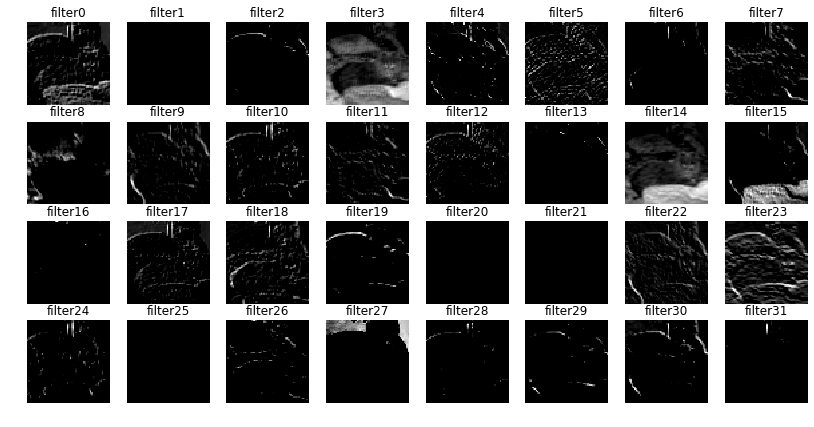

In [29]:
import matplotlib.image as mpimg

fig=plt.figure(figsize=(14,7))
columns = 8
rows = 4
for i in range(columns*rows):
    #img = mpimg.imread()
    fig.add_subplot(rows, columns, i+1)
    plt.axis('off')
    plt.title('filter'+str(i))
    plt.imshow(conv2d_6_features[0, :, :, i], cmap='gray')
plt.show()

### Segunda salida de capa de convolución

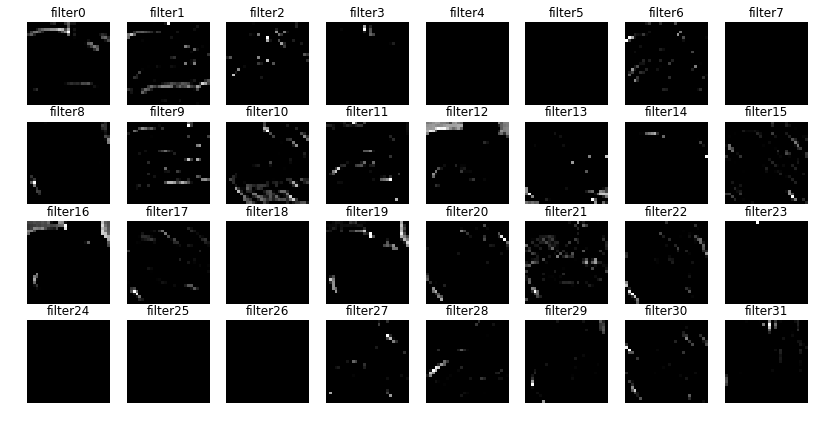

In [30]:
fig=plt.figure(figsize=(14,7))
columns = 8
rows = 4
for i in range(columns*rows):
    fig.add_subplot(rows, columns, i+1)
    plt.axis('off')
    plt.title('filter'+str(i))
    plt.imshow(conv2d_7_features[0, :, :, i], cmap='gray')
plt.show()

### Rendimiento del modelo en datos no vistos

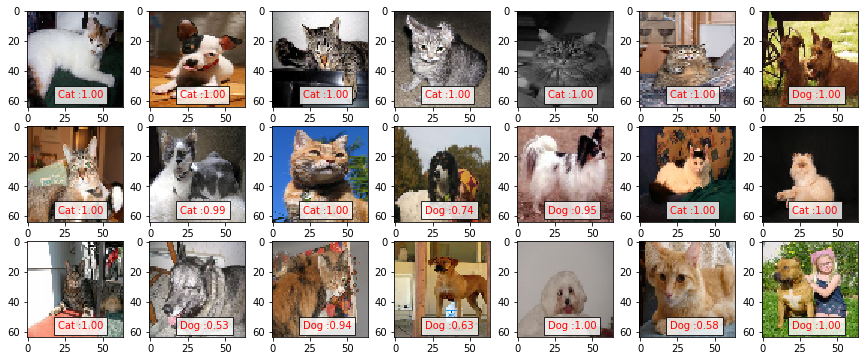

In [35]:
fig=plt.figure(figsize=(15, 6))
columns = 7
rows = 3
for i in range(columns*rows):
    fig.add_subplot(rows, columns, i+1)
    img1 = image.load_img('data/test1/'+test_set1.filenames[np.random.choice(range(12500))], target_size=(64, 64))
    img = image.img_to_array(img1)
    img = img/255
    img = np.expand_dims(img, axis=0)
    prediction = classifier.predict(img, batch_size=10)
    if(prediction[:,:]>0.5):
        value ='Dog :%1.2f'%(prediction[0,0])
        plt.text(20, 58,value,color='red',fontsize=10,bbox=dict(facecolor='white',alpha=0.8))
    else:
        value ='Cat :%1.2f'%(1.0-prediction[0,0])
        plt.text(20, 58,value,color='red',fontsize=10,bbox=dict(facecolor='white',alpha=0.8))
    plt.imshow(img1)

In [36]:
# %%capture
x1 = classifier.evaluate_generator(train_set)
x2 = classifier.evaluate_generator(test_set)

In [37]:
print('Training Accuracy  : %1.2f%%     Training loss  : %1.6f'%(x1[1]*100,x1[0]))
print('Validation Accuracy: %1.2f%%     Validation loss: %1.6f'%(x2[1]*100,x2[0]))

Training Accuracy  : 99.37%     Training loss  : 0.019547
Validation Accuracy: 76.11%     Validation loss: 1.742536


In [38]:
end_time = time()
finish = end_time - start_time

In [39]:
finish

38699.659573078156

In [58]:
import time
tiempo_total = time.strftime('%H:%M:%S', time.gmtime(finish))

In [61]:
print('El proceso total tardo ' + str(tiempo_total) + '.... .... .... CASI 11 HORAS!')

El proceso total tardo 10:44:59.... .... .... CASI 11 HORAS!


<img src='resources/images/coca.jpg'>

#### Tardo todo ese tiempo ya que lo corri en una pc sin GPU, use colab al principio, y probe varios modelos cambiando los parametros, los dos modelos anteriores fueron estos
#### El peor de todos
<img src='resources/images/malisimo.png'>

#### El anteultimo:
<img src='resources/images/menos_malo.png'>

#### El problema con colab es que lo use para hacer tantos computos, que me banearon por 24 hs, en las politicas detalla que tienen prioridad los usuarios que hagan computos simples y dinamicos, si lo que se ejecuta tarda mucho, pueden penalizar y me penalizaron, por eso termine corriendo todo el job en una pc sin GPU y por eso tardo tanto, en colab tardaba unas 2 hs

### Si hay errores de ortografia o faltan acentos... son las 4 de la mañana, no quiero ver mas este notebook...